In [1]:
run_optimization = False  # Here because the code in the notebook that optimizes is slow and painful to run often

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib import reload

from icedef import drift, metocean, simulator, plot, iceberg, test_case, timesteppers
from icedef import statoil_arcticnet_data as sd

In [3]:
plt.rcParams['figure.figsize'] = (6, 10)
plot_dir = './plots/'
start_time = np.datetime64('2015-04-24T22:53:29')
end_time = np.timedelta64(1, 'D')
tc = test_case.TestCaseB()
sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args)

# Running with Different Drift Models

In [4]:
sim.drift_model = drift.analytical_drift_wrapper
sim.run_simulation(label='analytical')

In [5]:
sim.drift_model = drift.newtonian_drift_wrapper
sim.run_simulation(label='newtonian')

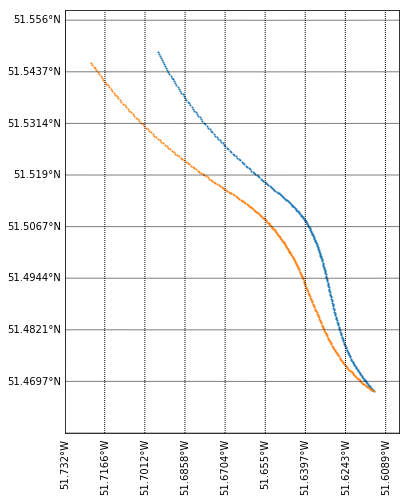

In [6]:
fig, ax = sim.results.plot(['analytical', 'newtonian'])

# Testing Drift Model with Constant Metocean Fields

In [7]:
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

In [8]:
def plot_test_case(sim, label='', title='', arrow_scale=1e5, pads=0.01, gap=20, sizes=[1], loc=0):
    
    forces = pd.read_csv('debug.log', names=['Fax', 'Fay', 'Fwx', 'Fwy', 'Fcx', 'Fcy', 'Fwpx', 'Fwpy', 
                                                     'Vwx', 'Vwy', 'Vcx', 'Vcy', 'Amwx', 'Amwy'])
    arrow_colors = ['red', 'blue', 'green', 'black']
    arrow_labels = ['Air', 'Water', 'Coriolis', 'Pressure']
    vectors = [[forces['Fax'], forces['Fay']], [forces['Fwx'], forces['Fwy']],
              [forces['Fcx'], forces['Fcy']], [forces['Fwpx'], forces['Fwpy']]]
    scatter_kwargs = {}
    map_kwargs = {'pads': pads}
    quiver_kwargs = {'color': arrow_colors, 'label': arrow_labels, 'scale': arrow_scale, 'gap': gap}
    legend_kwargs = {'loc': loc}
    kwargs = {'sizes': sizes,
              'vectors': vectors, 'title': title,
              'map_kwargs': map_kwargs,
              'quiver_kwargs': quiver_kwargs,
              'scatter_kwargs': scatter_kwargs,
              'legend_kwargs': legend_kwargs}
    
    return sim.results.plot([label], **kwargs)

## Default

In [9]:
label = 'default'
sim.run_simulation(label=label)

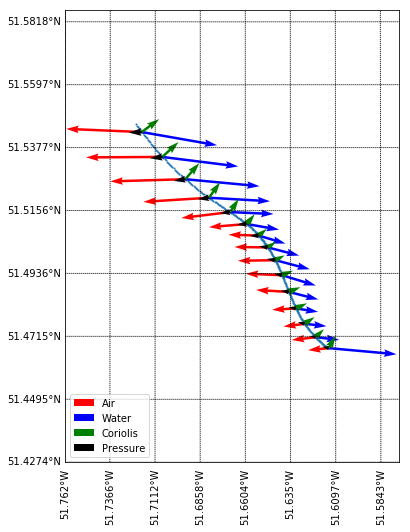

In [10]:
fig, ax = plot_test_case(sim, 'default', arrow_scale=2e6, pads=0.04)
fig.savefig(plot_dir + label + '.png', bbox_inches='tight')

## No Current, Constant Wind

In [93]:
label = 'no_current_constant_wind'
title = 'No Current Constant Wind'
sim.start_velocity = 0, 0
sim.set_constant_current((0, 0))
sim.set_constant_wind((10, 0))
sim.run_simulation(label=label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

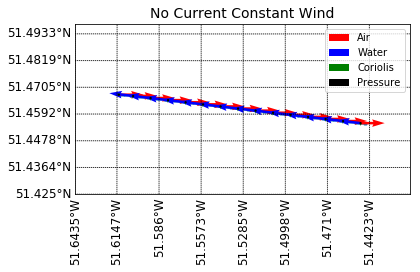

In [94]:
fig, ax = plot_test_case(sim, label=label, title=title, arrow_scale=1e7, pads=0.03, loc=1)
fig.savefig(plot_dir + label + '.png', bbox_inches='tight')

## No Wind, Constant Current

In [95]:
label = 'no_wind_constant_current'
title = 'No Wind Constant Current'
sim.start_velocity = 0.1, 0
sim.set_constant_current((0.1, 0))
sim.set_constant_wind((0, 0))
sim.run_simulation(label=label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

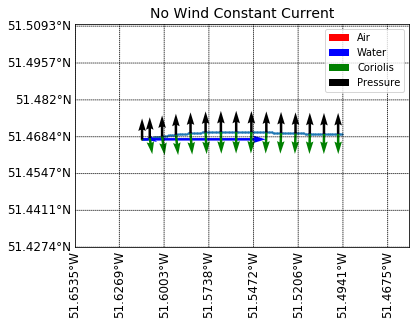

In [97]:
fig, ax = plot_test_case(sim, label=label, title=title, arrow_scale=1e6, pads=0.04, loc=1)
fig.savefig(plot_dir + label + '.png', bbox_inches='tight')

## No Wind or Current

In [98]:
label = 'no_wind_or_current'
title = 'No Current or Wind'
sim.start_velocity = 0.01, 0
sim.set_constant_current((0, 0))
sim.set_constant_wind((0, 0))
sim.run_simulation(label=label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

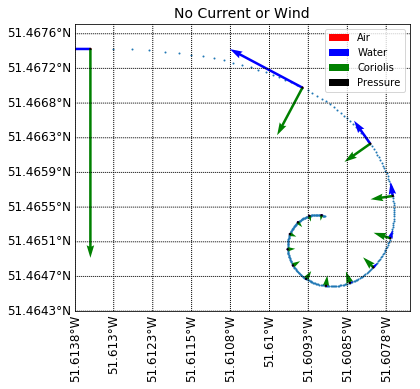

In [105]:
fig, ax = plot_test_case(sim, label=label, title=title, arrow_scale=1e5, pads=0.0003, loc=1)
fig.savefig(plot_dir + label + '.png', bbox_inches='tight')

## Constant Current and Wind

In [106]:
label = 'constant_current_and_wind'
title = 'Constant Current and Wind'
sim.start_velocity = 0, 0
sim.set_constant_current((0.1, 0))
sim.set_constant_wind((10, 0))
sim.run_simulation(label=label)
sim.reload_ocean()
sim.reload_atmosphere()
sim.reload_iceberg()

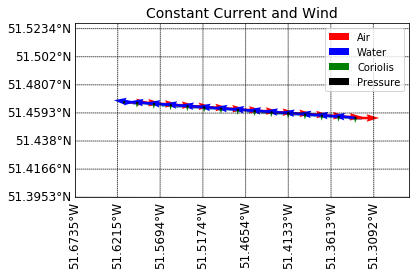

In [107]:
fig, ax = plot_test_case(sim, label=label, title=title, arrow_scale=1e7, pads=0.06, loc=1)
fig.savefig(plot_dir + label + '.png', bbox_inches='tight')

# Ekman

In [108]:
label = 'ekman'

# No Ekman
ekman = False
kwargs = {'ekman': ekman}
sim.run_simulation(label='no_ekman', **kwargs)

# Ekman to depth of 100 m
ekman = True
kwargs = {'ekman': ekman}
sim.run_simulation(label='ekman_100', **kwargs)

# Ekman to depth of 1000 m
ekman = True
depth_vec = np.arange(0, -1100, -100)
kwargs = {'ekman': ekman, 'depth_vec': depth_vec}
sim.run_simulation(label='ekman_1000', **kwargs)

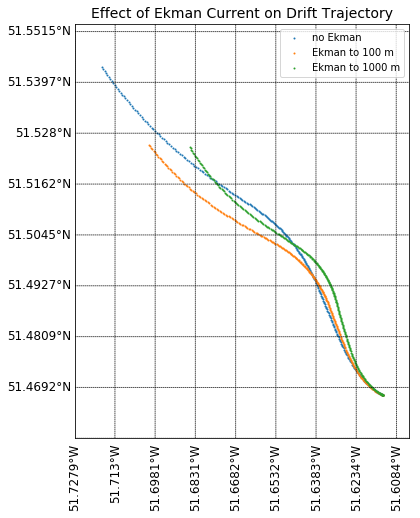

In [109]:
title = 'Effect of Ekman Current on Drift Trajectory'
pads = 0.01
labels = ['no Ekman', 'Ekman to 100 m', 'Ekman to 1000 m']
legend_kwargs = {'loc': 1}
map_kwargs = {'pads': pads}
kwargs = {'map_kwargs': map_kwargs, 'labels': labels, 'title': title, 'legend_kwargs': legend_kwargs}
fig, ax = sim.results.plot(['no_ekman', 'ekman_100', 'ekman_1000'], **kwargs)
fig.savefig(plot_dir + label + '.png', bbox_inches='tight')

# Varying Berg Size

In [110]:
sizes = ['MED', 'LG', 'VLG']
labels = ['MED', 'LG', 'VLG']

for size, label in zip(sizes, labels):

    sim.iceberg_size = size
    sim.run_simulation(label=label)

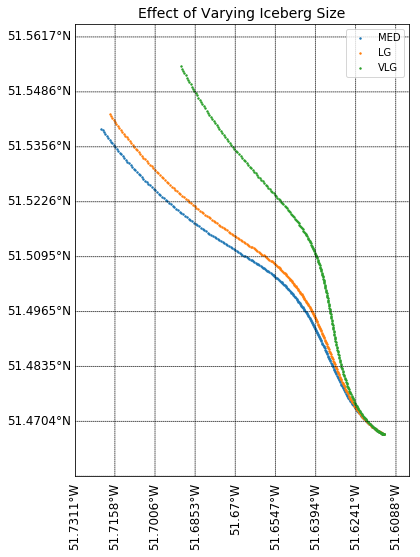

In [111]:
title = 'Effect of Varying Iceberg Size'
pads = 0.01 
map_kwargs = {'pads': pads}
sizes = 2
scatter_kwargs = {}
legend_kwargs = {'loc': 1}
kwargs = {'title': title, 'labels': labels, 'sizes': sizes,
          'map_kwargs': map_kwargs,
          'scatter_kwargs': scatter_kwargs,
          'legend_kwargs': legend_kwargs}
fig, ax = sim.results.plot(labels, **kwargs)
fig.savefig(plot_dir + 'sizes' + '.png', bbox_inches='tight')

In [112]:
size_class = 'LG'
min_length, max_length = iceberg.WATERLINE_LENGTH_RANGE_BY_SIZE[size_class]
min_height, max_height = iceberg.SAIL_HEIGHT_RANGE_BY_SIZE[size_class]

In [113]:
num_intervals = 10
lengths = np.linspace(min_length, max_length, num_intervals)
heights = np.linspace(min_height, max_height, num_intervals)
labels = []

for length, height in zip(lengths, heights):
    
    label = '{},{}'.format(int(length), int(height))
    labels.append(label)
    sim.iceberg_size = length, height
    sim.run_simulation(label=label)    

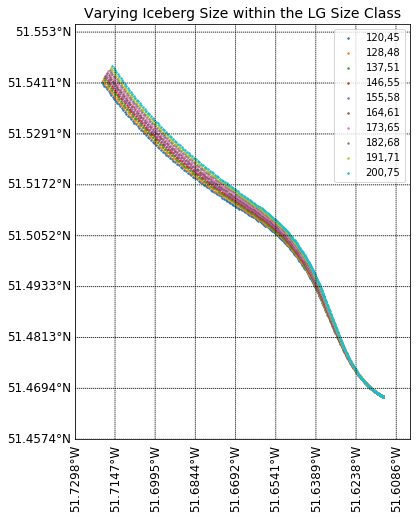

In [114]:
title = f'Varying Iceberg Size within the {size_class} Size Class'
pads = 0.01 
map_kwargs = {'pads': pads}
sizes = 2
scatter_kwargs = {}
legend_kwargs = {'loc': 1}
kwargs = {'title': title, 'labels': labels, 'sizes': sizes,
          'map_kwargs': map_kwargs,
          'scatter_kwargs': scatter_kwargs,
          'legend_kwargs': legend_kwargs}
fig, ax = sim.results.plot(labels, **kwargs)
fig.savefig(plot_dir + f'{size_class}_size_range.png')

# Varying Berg Shape

In [115]:
shapes = ['TAB', 'NTAB', 'DOM', 'PIN', 'WDG', 'DD', 'BLK']
labels = ['TAB', 'NTAB', 'DOM', 'PIN', 'WDG', 'DD', 'BLK']

for shape, label in zip(shapes, labels):

    sim.iceberg_shape = shape
    sim.run_simulation(label=label)

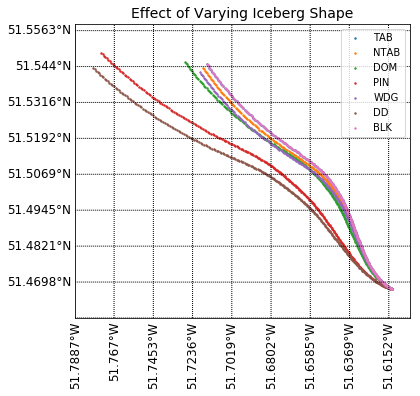

In [116]:
title = 'Effect of Varying Iceberg Shape'
pads = 0.01
map_kwargs = {'pads': pads}
sizes = 2
scatter_kwargs = {}
legend_kwargs = {'loc': 1}
kwargs = {'title': title, 'labels': labels, 'sizes': sizes,
          'map_kwargs': map_kwargs,
          'scatter_kwargs': scatter_kwargs,
          'legend_kwargs': legend_kwargs}
fig, ax = sim.results.plot(labels, **kwargs)
fig.savefig(plot_dir + 'shapes' + '.png', bbox_inches='tight')

# Effect of changing timestepper

In [117]:
label = 'euler'
sim.run_simulation(label=label)

In [118]:
label = 'rk2'
sim.time_stepper = timesteppers.rk2
sim.run_simulation(label=label)

In [119]:
label = 'rk4'
sim.time_stepper = timesteppers.rk4
sim.run_simulation(label=label)

In [120]:
label = 'ab2'
sim.time_stepper = timesteppers.ab2
sim.run_simulation(label=label)

In [121]:
label = 'ab3'
sim.time_stepper = timesteppers.ab3
sim.run_simulation(label=label)

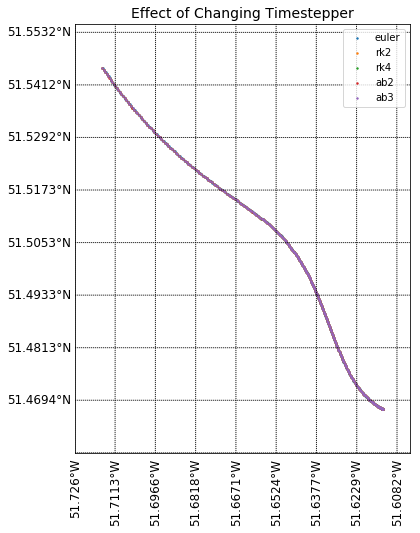

In [123]:
title = 'Effect of Changing Timestepper'
labels = ['euler', 'rk2', 'rk4', 'ab2', 'ab3']
pads = 0.01 
map_kwargs = {'pads': pads}
sizes = 2
scatter_kwargs = {}
legend_kwargs = {'loc': 1}
kwargs = {'title': title, 'labels': labels, 'sizes': sizes,
          'map_kwargs': map_kwargs,
          'scatter_kwargs': scatter_kwargs,
          'legend_kwargs': legend_kwargs}
fig, ax = sim.results.plot(labels, **kwargs)
fig.savefig(plot_dir + 'timesteppers' + '.png', bbox_inches='tight')